# Build a model which predicts sales based on the money spent on different platforms for marketing using advertising.csv dataset

**About :**

**This dataset was uploaded in Kaggle. It contains data on the budget allocated for TV, radio and newspaper advertisements with the resulting sales.**

**Target Variable :**

**(int) Sales**

**Predictors :**

**(int) TV - Budget of advertisements in TV**

**(int) Radio - Budget of advertisements in radio**

**(int) Newspaper - Budget of advertisements in newspaper**

# Import Libraries: Start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Anisha Kadam\\Downloads'

# Load and Explore Data: Load the dataset and understand its structure.

In [3]:
# To load dataset.

df= pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# To show no. of rows and columns.

df.shape

(200, 5)

In [5]:
# To remove unwanted column from given dataset permanently.

df.drop("Unnamed: 0", axis= 1, inplace= True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# here given dataset is type of supervised learning algorithm because this dataset
# is labelled means output variable is present and it is the example of regression why?
# because output variable sales is a contineous numeric value.

# Apply EDA in this dataset means cleaning process.
# 1) To check null values.

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
# To check datatypes of each columns.
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

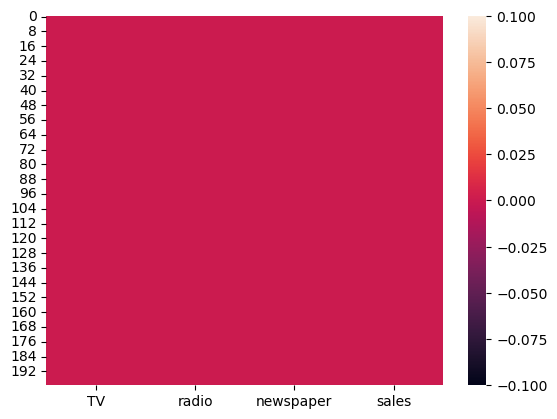

In [9]:
# Visualize null values

sns.heatmap(df.isnull())
plt.show()

In [10]:
# Check duplicate rows

df.duplicated().sum()

0

In [11]:
# use inbuilt method corr(): It is used to find the value of correlation between
# input and output.

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


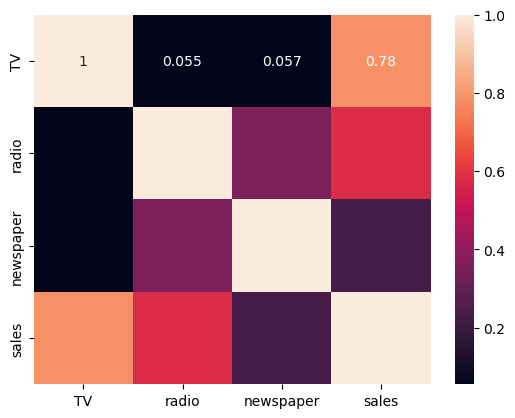

In [12]:
# To Visualize correlation values, use heatmap() visualization.

sns.heatmap(df.corr(), annot= True)
# annot means annotation = True by default False
#if annot= True means to show value of correlation in graph
plt.show()

We Clearly understood from this graph, good correlation of TV, Radio with sales
 but newspaper is bad correlated with sales.

 Means inputs TV and Radio both are important to predict the output sales
 but input newspaper is not important to predict output sales.

# Separting the features and target

In [13]:
# Select input and output from given dataset.

x= df[["TV", "radio"]] # select input: 2D
y= df["sales"] # Output (always 1D means only 1 column)

In [14]:
x.shape

(200, 2)

In [15]:
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [16]:
y.shape

(200,)

In [17]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Visualizing input and output features

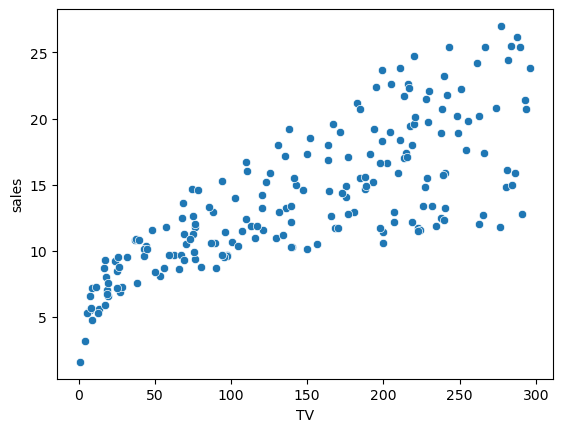

In [18]:
# Visualize scatterplot between input TV and output sales.

sns.scatterplot(data = df, x = "TV", y = "sales")

plt.show()

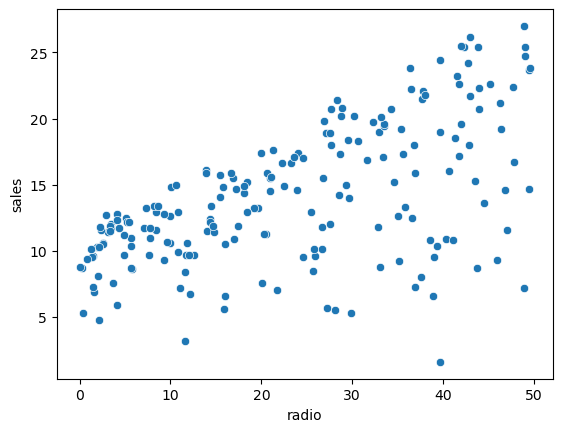

In [19]:
# Visualize scatterplot between input radio and output sales.

sns.scatterplot(data = df, x = "radio", y = "sales")

plt.show()

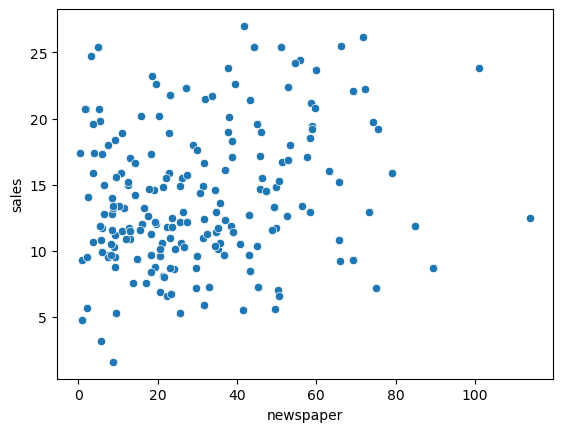

In [20]:
# Visualize scatterplot between input newspaper and output sales.

sns.scatterplot(data = df, x = "newspaper", y = "sales")

plt.show()

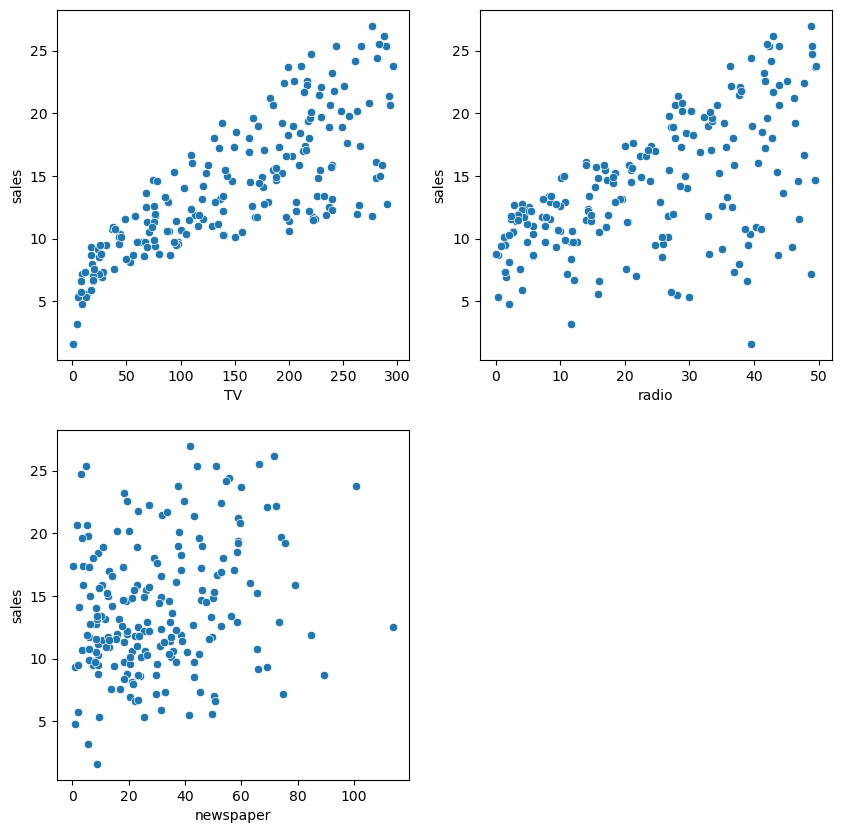

In [21]:
# subplot by using for loop.
# subplot() : method provides a way to plot multiple plots on a single figure.

column = ["TV", "radio", "newspaper"]
plt.figure(figsize = (10,10))

for i, v in enumerate(column):
    plt.subplot(2,2,i+1) # plt.subplot(no. of rows, no of cols, index)
    sns.scatterplot(data = df, x = v, y = "sales")

# Splitting the data into Training and Testing

In [22]:
# train test split

from sklearn.model_selection import train_test_split

In [23]:
# 70% of data is for training 
# 30% of data is for testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
x_train.shape, x_test.shape

((140, 2), (60, 2))

In [25]:
y_train.shape, y_test.shape

((140,), (60,))

In [26]:
x_train

,TV,radio
116,139.2,14.3
67,139.3,14.5
78,5.4,29.9
42,293.6,27.7
17,281.4,39.6
...,...,...
133,219.8,33.5
137,273.7,28.9
72,26.8,33.0
140,73.4,17.0


In [27]:
y_train

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: sales, Length: 140, dtype: float64

# Features Scaling

In [28]:
# Applying Feature Scaling on input x_train and x_test
# Apply Standard Scaler

from sklearn.preprocessing import StandardScaler

In [29]:
#create object of standard saling
ss=StandardScaler()

In [30]:
# apply scaling on training input x_train
x_train = ss.fit_transform(x_train)

# apply scaling on testing input x_test
x_test = ss.transform(x_test)

# fit_transform() and transform() both are inbuilt method of StandardScaler.

In [31]:
type(x_train), type(x_test)

(numpy.ndarray, numpy.ndarray)

In [32]:
x_train

array([[-0.04063534, -0.58562079],
       [-0.03948046, -0.57246816],
       [-1.58586722,  0.44028424],
       [ 1.74250219,  0.29560533],
       [ 1.6016066 ,  1.07818673],
       [-1.54775611,  1.68978396],
       [-0.72201561, -1.52603374],
       [-0.05564881,  1.52537611],
       [ 0.97566066, -0.48697608],
       [-1.28444306,  0.09173958],
       [ 1.3856437 ,  0.36794479],
       [ 0.81744185,  1.30178142],
       [ 1.67320928,  1.30178142],
       [-1.51310966,  0.90062625],
       [-1.44150699,  0.94666045],
       [ 0.77240146, -0.17131299],
       [-1.37336896,  0.78225259],
       [-0.76590112, -1.47342322],
       [ 1.24936765,  0.87432099],
       [-0.01638282,  0.2364185 ],
       [ 0.52063722, -0.13843142],
       [-0.09722455, -1.20379434],
       [ 1.12117577, -1.25640485],
       [ 0.93870444, -1.36820219],
       [-0.77629506, -0.81579179],
       [-0.52222106, -1.02623385],
       [-0.77860482, -0.19104193],
       [-1.55122076,  0.26272376],
       [ 0.55874832,

In [33]:
x_test

array([[ 0.78626004,  1.73581816],
       [ 0.69040485, -0.05951564],
       [-0.54300893, -1.43396534],
       [ 1.58774802, -0.86182599],
       [ 1.28285922, -0.12527879],
       [ 1.627014  ,  1.23601828],
       [ 0.23769118,  0.55208159],
       [ 0.43979549, -0.81579179],
       [-0.83288427, -0.47382345],
       [ 0.8393846 ,  0.02597644],
       [ 0.25154976, -0.15158405],
       [-0.84905261, -0.1778893 ],
       [ 0.83130043,  0.0522817 ],
       [-0.3801706 ,  1.61744451],
       [ 0.95949231, -0.98677596],
       [-0.19654439,  0.90062625],
       [-0.12725148, -0.3159919 ],
       [ 1.70901061, -1.25640485],
       [-1.35258109,  1.03872885],
       [ 0.78510516,  0.41397899],
       [-0.48872949, -0.89470756],
       [-0.86522096,  0.8808973 ],
       [-1.3583555 ,  0.16407904],
       [-0.40788776, -0.60534973],
       [-0.34436926, -0.38175505],
       [ 0.52756651, -0.33572085],
       [-1.15047677,  0.22984219],
       [ 1.22511513,  0.25614744],
       [ 0.27811204,

# Model Training : Train a Linear Regression model using the training data

In [34]:
# sklearn: inbuilt package
# linear_model: inbuilt outer class
# LinearRegression: inbuilt inner class
# 1) Train the model with 70% data then use inbuilt method fit (input, output)
# 2) Test the model with 30% data use inbuilt method predict(texting input)


In [35]:
# Perform the model with LinearRegression algoithm
#call class
from sklearn.linear_model import LinearRegression

In [36]:
# Create the object of class LinearRegression

lr = LinearRegression()

In [37]:
# Train the model with 70% data, use inbuilt method fit() of LinearRegression class

lr.fit(x_train, y_train)

LinearRegression()

In [38]:
# Check slope or gradient or coefficient of each inputs
# use inbuilt attributes of LinearRegression class
# coef_

lr.coef_

array([4.06756287, 2.70136813])

In [39]:
# To show all columns name
x.columns

Index(['TV', 'radio'], dtype='object')

#slope of TV: 4.06756287 

#slope of radio: 2.70136813

In [40]:
# Check intercept, use inbuilt attributes intercept_ of LinearRegression class

lr.intercept_

13.79142857142857

# Model Evaluation: Evaluate the trained model using testing data and metrics like Mean Squared Error (MSE)

In [41]:
# Test the model with 30% data, use inbuilt method predict() of LinearRegression class.
# Equation of line(if one input X)Y_predict = mX+c
# But we have 2 inputs TV and radio, Y_pred = m1*TV + m2*radio +c

y_pred = lr.predict(x_test)
y_pred

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [42]:
# Creating a dictionary

dict = {'Actual Output': y_test, 'Predicted Output': y_pred}
dict = pd.DataFrame(dict)
dict

,Actual Output,Predicted Output
58,23.8,21.678675
40,16.6,16.438920
34,9.5,7.709037
102,14.8,17.921584
184,17.6,18.671115
198,25.5,23.748351
95,16.9,16.249628
4,12.9,13.376570
29,10.5,9.123648
168,17.1,17.275850


In [43]:
# check mean squared error MSE = RSS/no. of records
# RSS means residual sum of squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.9147050289721796


#Cross check: model is correct or not, 
#first check model is underfit or not? 
#if model is no underfit then check model is overfit or not?

#condition for underfit the model: training's score < testing score

#condition for overfit the model: training's score > testing score


In [44]:
#first find the training score
#use inbuilt method score() of linear regression class
score1=lr.score(x_train,y_train)
score1=np.round(score1,2)
print("training score: ",score1)

training score:  0.88


In [45]:
#find the testing score
#use inbuilt method score() of LinearRegression class
score2=lr.score(x_test,y_test)
score2=round(score2,2)
print("testing score: ",score2)

testing score:  0.92


In [46]:
#here training score is less than testing score means model is underfit
#to overcome or remove underfitting problems of model then add new features(input) in given dataset:
#here input : tv or radio

#polynomial Linear Regression
#TV      TV**2

# Polynomial Features

In [47]:
#call polynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

In [48]:
#create the object of PolynomialFeatures class and passing the degree suppose pass degree=2
#pf=PolynomialFeatures(2) #2 is the degree
pf=PolynomialFeatures(3) # 3 is output degree

In [49]:
#increase the degree of input x: TV and radio
#use inbuilt method fir_transform() of polynomialfeatures class
x_poly=pf.fit_transform(x)

In [50]:
x_poly

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [51]:
#train test split:means to split data into 70% & 30%
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.3, random_state = 1)

In [52]:
x_train.shape, x_test.shape

((140, 10), (60, 10))

In [53]:
#perform the model with LinearRegression
#create gthe object of class linearRegression
lr=LinearRegression()

In [54]:
#train the model with 70% data, use inbuilt method fit() of LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
#check slope/ coefficient of each inputs/features
lr.coef_

array([ 0.00000000e+00,  9.16483199e-02,  2.25347616e-02, -4.65701531e-04,
        1.30652795e-03, -1.62567917e-04,  8.31531755e-07, -7.44270012e-07,
       -1.18928234e-06,  9.37589630e-06])

In [56]:
#$check intercept
lr.intercept_

4.162147477344121

In [57]:
#Test the model with 30% testing input
#y_pred=m1*TV**1+m3*TV**2+m1*radio**0+m2*radio**1+m3*radio**2+c
#c intercept
y_pred=lr.predict(x_test)

In [58]:
dict={"autual output":y_test,"predicted output":y_pred}
df1=pd.DataFrame(dict)
df1

,autual output,predicted output
58,23.8,23.841888
40,16.6,16.154362
34,9.5,9.593118
102,14.8,14.865757
184,17.6,17.420540
198,25.5,25.472200
95,16.9,17.097140
4,12.9,12.923023
29,10.5,10.356254
168,17.1,16.854792


In [59]:
#check mean squared error
mse=mean_squared_error(y_test,y_pred)
print("mean squared error : ",mse)

mean squared error :  0.1446907864594868


In [60]:
#Evaluation the model,
#check training score
#use inbuilt method score() of linearregression class
score1=lr.score(x_train,y_train)
score1=np.round(score1,2)
print("training score: ",score1)

training score:  0.99


In [61]:
#find the testing score
#use inbuilt method score() of LinearRegression class
score2=lr.score(x_test,y_test)
score2=round(score2,2)
print("testing score: ",score2)

testing score:  0.99


In [62]:
#here model is underfit because training score < testing score

**Clearly : Model is perfect on degree input=3**

**Here model is no underfit or no overfit**

**Here training score = testing score**

**Perfect model : training score>=testing score**


**CONCLUSION**

**The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper**